## Libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import keplergl
import base64

### Labs for work

* pip install geopy
* pip install ipywidgets
* pip install jupyterlab
* pip install nodejs
* pip install geojson
* pip install keplergl
* pip install h3
* pip install -U --pre h3
* pip install pydeck


* pharmacies_inter - Аптеки и лекарства
* beauty_salon_inter - салоны красоты
* elite_sports_inter - элитный спорт
* sprtswr_ftwr_inter - спортивная одежда
* sprt_good_inter - спортивный инвентарь
* trvl_rus - путешествия по России
* trvl_abrd - путешествия за пределами России
* sprt_fit_inter - Спорт, активный отдых
* hunting_fishing_inter - охота, рыбалка
* fashion_inter - мода и стиль
* coffee_inter - кофе
* med_serv_inter - медицинские услуги
* education_inter - образование
* delivery_inter - доставка еды
* markets_inter - супермаркеты
* no_children - без детей

In [2]:
tracks=pd.read_csv('C:/Users/Asus/Downloads/tracks_v4.csv',index_col=None,sep=',')

In [3]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716777 entries, 0 to 2716776
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Unnamed: 0.1           int64  
 2   id                     int64  
 3   start_dttm             object 
 4   end_dttm               object 
 5   centroid_wkt           object 
 6   centroid_lon           float64
 7   centroid_lat           float64
 8   start_dttm_day         int64  
 9   h3_9                   object 
 10  age                    float64
 11  car_owners             int64  
 12  carsharing_user        int64  
 13  not_citizen_rf         int64  
 14  gender                 int64  
 15  healthy_food_inter     int64  
 16  income                 float64
 17  public_trnsprt_user    int64  
 18  pharmacies_inter       int64  
 19  beauty_salon_inter     int64  
 20  elite_sports_inter     int64  
 21  sprtswr_ftwr_inter     int64  
 22  sprt_good_inter   

In [4]:
from datetime import datetime

In [5]:
tracks['start_dttm']=list(map(str,tracks['start_dttm']))

In [6]:
tracks=tracks[tracks['start_dttm']!='nan']

In [7]:
tracks['start_dttm']=list(map(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),tracks['start_dttm']))
tracks['end_dttm']=list(map(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),tracks['end_dttm']))

In [8]:
tracks['time_spent']=list(map(lambda x,y:(x-y).total_seconds()/60,tracks['end_dttm'],tracks['start_dttm']))


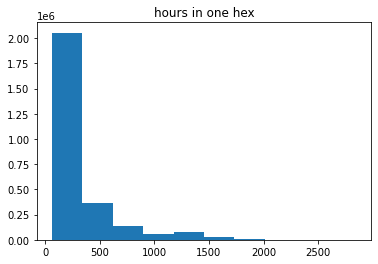

2848.516666666667  hours= 1.9781365740740742  days


In [9]:
plt.hist(tracks.time_spent)
plt.title('hours in one hex')
plt.show()
print(max(tracks.time_spent),' hours=',max(tracks.time_spent)/24/60,' days')

In [10]:
print(min(tracks['start_dttm']))
print(max(tracks['start_dttm']))


2023-03-02 00:00:19
2023-03-20 22:59:49


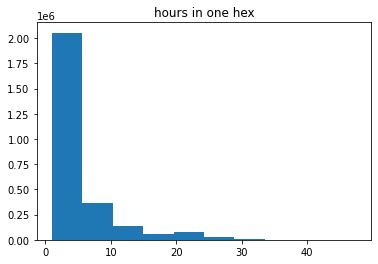

47.475277777777784  hours= 1.9781365740740742  days


In [11]:
plt.hist(tracks.time_spent/60)
plt.title('hours in one hex')
plt.show()
print(max(tracks.time_spent/60),' hours=',max(tracks.time_spent)/24/60,' days')

In [12]:
np.min(tracks['time_spent']) #внутри одного гексогона минимум 1 час

60.0

In [13]:
time_average=pd.pivot_table(tracks,index=('id','h3_9'),values='time_spent',aggfunc='mean').reset_index()
time_average

id             h3_9  time_spent
0                  0  89110604c47ffff   94.066667
1                  0  891106a9817ffff  155.795946
2                  0  891106a9873ffff  109.741667
3                  0  891106a987bffff  122.640278
4                  0  891106a98a3ffff   91.800000
...              ...              ...         ...
410447  773094113323  89110606447ffff  572.857692
410448  773094113323  89110606463ffff   84.650000
410449  773094113323  89110606477ffff   60.000000
410450  773094113323  8911060647bffff   73.033333
410451  773094113323  891106075a3ffff   96.557619

[410452 rows x 3 columns]

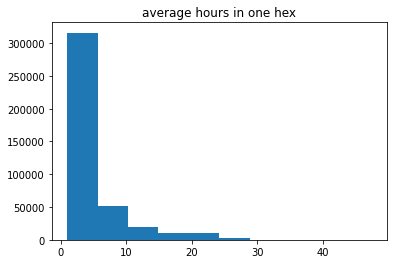

47.475277777777784  hours= 1.9781365740740742  days


In [14]:
plt.hist(time_average.time_spent/60)
plt.title('average hours in one hex')
plt.show()
print(max(time_average.time_spent/60),' hours=',max(time_average.time_spent)/24/60,' days')

In [15]:
time_average['count']=1
number_of_hex_per_id=pd.pivot_table(time_average,index='id',values='count',aggfunc=sum).reset_index()
number_of_hex_per_id

id  count
0                 0      6
1                 1      2
2                 2      7
3                 3      4
4                 4      5
...             ...    ...
41258  773094113317      1
41259  773094113320      1
41260  773094113321      4
41261  773094113322      6
41262  773094113323      6

[41263 rows x 2 columns]

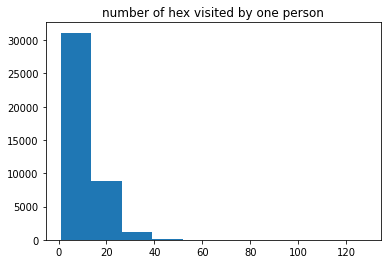

In [16]:
plt.hist(number_of_hex_per_id['count'])
plt.title('number of hex visited by one person')
plt.show()


In [17]:

number_of_hex_per_id.columns=['id','hex per one person']
number_of_hex_per_id.sort_values('hex per one person').head(-10)


id  hex per one person
31061  575525618231                   1
33230  618475290968                   1
33220  618475290953                   1
33217  618475290949                   1
9204   171798691929                   1
...             ...                 ...
4948    85899346467                  60
23312  438086664304                  60
2051    34359738634                  61
19492  360777253310                  61
22435  420906795148                  63

[41253 rows x 2 columns]

In [18]:


map1 = keplergl.KeplerGl(height=400, data={"data_1": tracks[tracks['id']==420906795148][['id','h3_9','time_spent']]})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [19]:
from datetime import datetime
tracks['current_date']=list(map(lambda x:pd.to_datetime(x).date(),tracks['start_dttm']))

In [20]:
tracks['count']=1
pd.pivot_table(tracks,index=('current_date'),values='count',aggfunc=sum).reset_index()

current_date   count
0    2023-03-02   30788
1    2023-03-03  143673
2    2023-03-04  154108
3    2023-03-05  154182
4    2023-03-06  155726
5    2023-03-07  154915
6    2023-03-08  153056
7    2023-03-09  145443
8    2023-03-10  144108
9    2023-03-11  155056
10   2023-03-12  153520
11   2023-03-13  153642
12   2023-03-14  152845
13   2023-03-15  149651
14   2023-03-16  143442
15   2023-03-17  143653
16   2023-03-18  154112
17   2023-03-19  153643
18   2023-03-20  121214

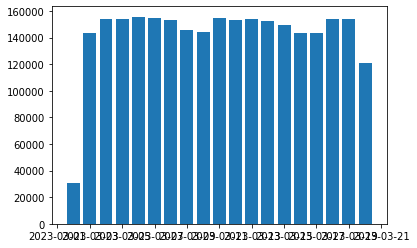

In [21]:
dates=pd.pivot_table(tracks,index=('current_date'),values='count',aggfunc=sum).reset_index()
plt.bar(dates['current_date'],dates['count'])
plt.show()

Просто полезные команды

import h3
lat, lng = 37.769377, -122.388903
resolution = 9
h3.cell_to_latlng('89110607627ffff')

import h3
lat, lng = 59.743442,30.615682, 
resolution = 9
h3.latlng_to_cell(lat, lng, resolution)

### Как я получила новые границы для пребывания в гексогоне 

In [22]:
tracks=tracks.sort_values(by=['id','start_dttm'])
tracks['end_dttm_diff1']=[0]+list(tracks['end_dttm'])[:-1]
tracks['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,tracks['start_dttm'],tracks['end_dttm_diff1']))
tracks=tracks.reset_index()


In [23]:
def complex_check(ids,id1,idm1,tsbe,tsbe1,hexs,hex1,hexm1):
    if hexs==hex1 and ids==id1 and tsbe1==0 and (ids!=idm1 or hexs!=hexm1 or tsbe!=0):
        return 's'
    elif ids==id1 and ids==idm1 and hexs==hexm1 and hexs==hex1 and tsbe==0 and tsbe1==0:
        return 'c'
    elif ids==idm1 and hexs==hexm1 and tsbe==0 and (ids!=id1 or hexs!=hex1 or tsbe1!=0):
        return 'e'
    else:
        return 'n'
    

In [24]:
tracks['id1']=list(tracks['id'])[1:]+[0]
tracks['idm1']=[0]+list(tracks['id'])[:-1]
tracks['tsbe1']=list(tracks['time_spent_bt_events'])[1:]+[0]
tracks['hex1']=list(tracks['h3_9'])[1:]+[0]
tracks['hexm1']=[0]+list(tracks['h3_9'])[:-1]

In [25]:
tracks['complex_check']=list(map(complex_check,
                                 tracks['id'],
                                 tracks['id1'],
                                 tracks['idm1'],
                                 tracks['time_spent_bt_events'],
                                 tracks['tsbe1'],
                                 tracks['h3_9'],
                                 tracks['hex1'],
                                 tracks['hexm1']))
                        

In [26]:
tracks_ready=tracks[tracks['complex_check']=='n']

In [27]:
tracks_correct=tracks[tracks['complex_check']!='n']
tracks_correct=tracks_correct[tracks_correct['complex_check']!='c']
tracks_correct['start_dttm_diffm1']=[0]+list(tracks_correct['start_dttm'])[:-1]
tracks_correct=tracks_correct[tracks_correct['complex_check']=='e']
tracks_correct['start_dttm']=tracks_correct['start_dttm_diffm1']
del tracks_correct['start_dttm_diffm1']

tracks_ready=tracks_ready.append(tracks_correct)
tracks_ready=tracks_ready.sort_values(by=['id','start_dttm'])


In [28]:
tracks_ready.shape

(2012677, 46)

Посчитаю расстояния

In [29]:
#(lat, lon) - посчитать расстояния
def find_dist1(lat1,lon1,lat2,lon2):
    try:
        lat1=lat1/57.36049
        lat2=lat2/57.36049
        lon1=lon1/57.36049
        lon2=lon2/57.36049
        return 2*6371*np.arcsin((np.sin((lat2-lat1)/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin((lon1-lon2)/2)**2)**0.5)

    except ValueError:
        return 0

In [30]:
tracks_ready['centroid_lon1']=[0]+list(tracks_ready['centroid_lon'])[:-1]
tracks_ready['centroid_lat1']=[0]+list(tracks_ready['centroid_lat'])[:-1]
tracks_ready['distance']=list(map(find_dist1,tracks_ready['centroid_lat'],tracks_ready['centroid_lon'],tracks_ready['centroid_lat1'],tracks_ready['centroid_lon1']))

In [31]:
tracks_ready['id1']=list(tracks_ready['id'])[1:]+[0]
tracks_ready['idm1']=[0]+list(tracks_ready['id'])[:-1]
tracks_ready['distance']=list(map(lambda d,idm1,ids: d if idm1==ids else 0,tracks_ready['distance'],tracks_ready['idm1'],tracks_ready['id']))


Код как адреса подтянуть

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
big_diff_dist=tracks_f[tracks_f['distances between events']>200]
big_diff_dist=big_diff_dist.reset_index()
#address=address.reset_index()
for index in range(0,len(big_diff_dist)):
    big_diff_dist.iloc[index:index+1,-1:]=geolocator.reverse(str(big_diff_dist['centroid_lat'][index])+','+str(big_diff_dist['centroid_lon'][index])).address
    print(index/len(big_diff_dist))
    clear_output(wait=True)

In [32]:
tracks_ready=tracks_ready[['id', 'start_dttm', 'end_dttm',
       'centroid_wkt', 'centroid_lon', 'centroid_lat', 'start_dttm_day',
       'h3_9', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf',
       'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user',
       'pharmacies_inter', 'beauty_salon_inter', 'elite_sports_inter',
       'sprtswr_ftwr_inter', 'sprt_good_inter', 'trvl_rus', 'trvl_abrd',
       'sprt_fit_inter', 'hunting_fishing_inter', 'fashion_inter',
       'coffee_inter', 'med_serv_inter', 'education_inter', 'delivery_inter',
       'markets_inter', 'no_children', 'time_spent', 'current_date', 'count',
       'end_dttm_diff1', 'time_spent_bt_events', 'id1', 'idm1', 'tsbe1',
       'hex1', 'hexm1', 'complex_check', 'centroid_lon1', 'centroid_lat1',
       'distance']]

In [33]:
tracks_ready['current_date']=list(map(lambda x:pd.to_datetime(x).date(),tracks_ready['start_dttm']))


In [34]:
tracks_ready['end_dttm_diff1']=[0]+list(tracks_ready['end_dttm'])[:-1]
tracks_ready['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,tracks_ready['start_dttm'],tracks_ready['end_dttm_diff1']))
tracks_ready['time_spent_bt_events']=list(map(lambda d,idm1,ids: d if idm1==ids else 0,tracks_ready['time_spent_bt_events'],tracks_ready['idm1'],tracks_ready['id']))

In [35]:
tracks_ready['time_spent']=list(map(lambda x,y:(x-y).total_seconds()/60,tracks_ready['end_dttm'],tracks_ready['start_dttm']))


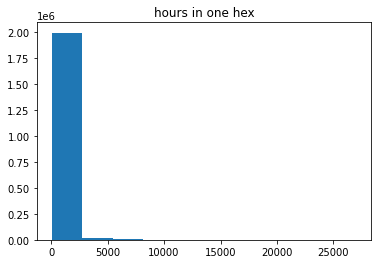

27008.366666666665  hours= 18.755810185185183  days
372.1182606465586  hours= 0.25841545878233235  days


In [36]:
plt.hist(tracks_ready.time_spent)
plt.title('hours in one hex')
plt.show()
print(max(tracks_ready.time_spent),' hours=',max(tracks_ready.time_spent)/24/60,' days')
print(np.mean(tracks_ready.time_spent),' hours=',np.mean(tracks_ready.time_spent)/24/60,' days')

In [37]:
np.min(tracks_ready.time_spent)

60.0

In [38]:
tracks_ready['speed']=tracks_ready['distance']/(tracks_ready['time_spent_bt_events']/60)

In [39]:
tracks_ready.columns

Index(['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children', 'time_spent', 'current_date', 'count', 'end_dttm_diff1',
       'time_spent_bt_events', 'id1', 'idm1', 'tsbe1', 'hex1', 'hexm1',
       'complex_check', 'centroid_lon1', 'centroid_lat1', 'distance', 'speed'],
      dtype='object')

# Тут работаем с пропусками


че делаем - для каждого id находим самый популярный по времени проведения (в сумме где больше всего времени проводит) гекс. Для каждого гекса находим средние значения для каждой из переменных, которые хотим заполнить. Не округляю бинарные переменные - будем интерпретировать как вероятность того, что человек принадлежит к какой-то группе (н-р, вероятность, что человек использует машину 2% или 100%, если есть инфо в самом файле) Соединяем типовые описания для каждого гекса с id по самым популярным гексам, далее проверяем, есть ли данные ля id по это переменной и если нет - заполняем новым значением. Далее это дело запихиваем в основной датасет. Если человек где-то проводит одинаковое количество максимального времени, оставляю случайный гекс 


In [40]:
#самые популярные гексы
tracks_ready['count']=1
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='time_spent',aggfunc=sum).reset_index()
hex_pivot2=pd.pivot_table(hex_pivot,index='id',values='time_spent',aggfunc=max).reset_index()
hex_pivot2['max_time_spending']='max_time_spending'
hex_pivot=pd.merge(hex_pivot,hex_pivot2[['id','max_time_spending','time_spent']],on=('id','time_spent'),how='left')
hex_pivot=hex_pivot[hex_pivot['max_time_spending']=='max_time_spending'][['id','h3_9']]



In [41]:
hex_pivot=hex_pivot.drop_duplicates(subset='id')

Сделаю внуренний анализ по гексам (можно конечно использовать файл hex, но я лично так и не получила ответа, как он был сформирован и из каких данных так что спасибо сами все сами).Важно! Для вытаскивания данных здесь я использую оргинальный датасет, так как в новом я не следила за сохранением данных по другим переменным.  

In [42]:
hexdf=pd.DataFrame(tracks['h3_9'].drop_duplicates())


In [43]:
columns_to_fill_list=['h3_9', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children']

In [44]:
columns_to_fill=tracks[columns_to_fill_list]
columns_to_fill=columns_to_fill.replace(np.nan,-1)
for cl in columns_to_fill.columns[1:]:
    df=pd.pivot_table(columns_to_fill[columns_to_fill[cl]>=0],index='h3_9',values=cl,aggfunc=np.mean)
    hexdf=pd.merge(hexdf,df,how='left',on='h3_9')
    hexdf[cl]=hexdf[cl].replace(np.nan,columns_to_fill[columns_to_fill[cl]>=0][cl].mean())


In [45]:
iddf=pd.DataFrame(tracks['id'].drop_duplicates())
for cl in columns_to_fill_list[1:]:
    df=tracks[['id',cl]].drop_duplicates()
    iddf=pd.merge(iddf,df,how='left',on='id')
    


In [46]:
iddf=pd.merge(iddf,hex_pivot,how='left',on='id')


In [47]:
new_columns=['h3_9']
for index in hexdf.columns[1:]:
    new_columns.append(index+'_m')


In [48]:
hexdf.columns=new_columns

In [49]:
hexdf.columns

Index(['h3_9', 'age_m', 'car_owners_m', 'carsharing_user_m',
       'not_citizen_rf_m', 'gender_m', 'healthy_food_inter_m', 'income_m',
       'public_trnsprt_user_m', 'pharmacies_inter_m', 'beauty_salon_inter_m',
       'elite_sports_inter_m', 'sprtswr_ftwr_inter_m', 'sprt_good_inter_m',
       'trvl_rus_m', 'trvl_abrd_m', 'sprt_fit_inter_m',
       'hunting_fishing_inter_m', 'fashion_inter_m', 'coffee_inter_m',
       'med_serv_inter_m', 'education_inter_m', 'delivery_inter_m',
       'markets_inter_m', 'no_children_m'],
      dtype='object')

In [50]:
iddf=pd.merge(iddf,hexdf,how='left',on='h3_9')


In [51]:
iddf=iddf.replace(np.nan,-1)

In [52]:
for cl in columns_to_fill_list[1:]:
    iddf[cl]=list(map(lambda x,y:x if x>=0 else y,iddf[cl],iddf[cl+"_m"]))

In [53]:
tracks_ready=tracks_ready[['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9',  'time_spent',
       'current_date', 'count', 'end_dttm_diff1', 'time_spent_bt_events',
       'id1', 'idm1', 'tsbe1', 'hex1', 'hexm1', 'complex_check',
       'centroid_lon1', 'centroid_lat1', 'distance', 'speed']]

In [54]:
tracks_ready=pd.merge(tracks_ready,iddf[['id','age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children']],how='left',on='id')

In [55]:
tracks_ready.columns

Index(['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9', 'time_spent', 'current_date',
       'count', 'end_dttm_diff1', 'time_spent_bt_events', 'id1', 'idm1',
       'tsbe1', 'hex1', 'hexm1', 'complex_check', 'centroid_lon1',
       'centroid_lat1', 'distance', 'speed', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children'],
      dtype='object')

In [56]:
import h3
tracks_ready['h3_9_new']=list(map(lambda lat,lng:h3.latlng_to_cell(lat,lng,9),tracks_ready['centroid_lat'],tracks_ready['centroid_lon']))

In [57]:
tracks_ready['hex_check']=tracks_ready['h3_9_new']==tracks_ready['h3_9']

In [58]:
len(np.unique(tracks_ready['h3_9']))

50909

In [59]:
lat_min = 59.804842
lat_max = 60.093279
lon_min = 30.094747
lon_max = 30.609159

In [60]:
tracks_ready['in spb']=list(map(lambda lat,lon:1 if (lat>=lat_min) & (lat<=lat_max) & (lon>=lon_min) & (lon<=lon_max) else 0,tracks_ready['centroid_lat'],tracks_ready['centroid_lon']))

In [61]:
len(np.unique(tracks_ready[tracks_ready['in spb']==1]['h3_9']))

5821

In [62]:
len(tracks_ready[tracks_ready['in spb']==1])

1138203

In [63]:
tracks_ready.describe()

id  centroid_lon  centroid_lat  start_dttm_day    time_spent  \
count  2.012677e+06  2.012677e+06  2.012677e+06    2.012677e+06  2.012677e+06   
mean   3.846488e+11  3.182786e+01  5.944893e+01    1.156841e+01  3.721183e+02   
std    2.233699e+11  8.303446e+00  2.128500e+00    5.218764e+00  8.098564e+02   
min    0.000000e+00  1.988546e+01  4.156777e+01    3.000000e+00  6.000000e+01   
25%    1.889786e+11  3.023662e+01  5.977833e+01    7.000000e+00  8.598333e+01   
50%    3.865471e+11  3.036573e+01  5.989960e+01    1.200000e+01  1.617833e+02   
75%    5.755256e+11  3.049138e+01  5.999681e+01    1.600000e+01  4.433833e+02   
max    7.730941e+11  1.608450e+02  7.126758e+01    2.000000e+01  2.700837e+04   

           count  time_spent_bt_events           id1          idm1  \
count  2012677.0          2.012677e+06  2.012677e+06  2.012677e+06   
mean         1.0          1.233075e+02  3.846488e+11  3.846484e+11   
std          0.0          4.000455e+02  2.233699e+11  2.233698e+11   
min          1.0         -1.404900e+03  0.000000e+00  0.000000e+00   
25%          1.0          0.000000e+00  1.889786e+11  1.889786e+11   
50%          1.0          4.238333e+01  3.865471e+11  3.865471e+11   
75%          1.0          1.233833e+02  5.755256e+11  5.755256e+11   
max          1.0          2.355702e+04  7.730941e+11  7.730941e+11   

              tsbe1  ...  sprt_fit_inter  hunting_fishing_inter  \
count  2.012677e+06  ...    2.012677e+06           2.012677e+06   
mean  -3.721057e+02  ...    3.032479e-02           2.813815e-02   
std    3.531422e+03  ...    1.714795e-01           1.653675e-01   
min   -2.724265e+04  ...    0.000000e+00           0.000000e+00   
25%    0.000000e+00  ...    0.000000e+00           0.000000e+00   
50%    4.240000e+01  ...    0.000000e+00           0.000000e+00   
75%    1.234333e+02  ...    0.000000e+00           0.000000e+00   
max    2.355702e+04  ...    1.000000e+00           1.000000e+00   

       fashion_inter  coffee_inter  med_serv_inter  education_inter  \
count   2.012677e+06  2.012677e+06    2.012677e+06     2.012677e+06   
mean    1.107376e-01  1.143114e-01    2.405388e-01     3.136703e-01   
std     3.138070e-01  3.181892e-01    4.274108e-01     4.639842e-01   
min     0.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%     0.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
50%     0.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
75%     0.000000e+00  0.000000e+00    0.000000e+00     1.000000e+00   
max     1.000000e+00  1.000000e+00    1.000000e+00     1.000000e+00   

       delivery_inter  markets_inter   no_children        in spb  
count    2.012677e+06   2.012677e+06  2.012677e+06  2.012677e+06  
mean     3.289619e-01   5.196239e-01  7.219812e-01  5.655170e-01  
std      4.698362e-01   4.996149e-01  4.480228e-01  4.956891e-01  
min      0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  
25%      0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  
50%      0.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  
75%      1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  
max      1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  

[8 rows x 39 columns]

# POIs

In [64]:
pois=pd.read_csv('C:/Users/Asus/Downloads/Telegram Desktop/full_POIs.csv',sep=';',encoding='UTF8')
pois['new_sub_cat_code']=list(map(str,pois['new_sub_cat_code']))
pois.head(10)


c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0  index             coordinates                          name  \
0           0    0.0    [30.205252, 59.8616]                        GPower   
1           1    1.0   [30.205848, 59.86133]                    Global Gas   
2           2    2.0  [30.246048, 59.877287]  Газпром газомоторное топливо   
3           3    3.0  [30.164843, 59.805513]                         ВиГаз   
4           4    4.0  [30.168601, 59.811463]                        РосГаз   
5           5    5.0  [30.189314, 59.824641]                        Vervex   
6           6    6.0  [30.215474, 59.846405]                      Северное   
7           7    7.0  [30.202743, 59.857229]                          СЗТК   
8           8    8.0  [30.191326, 59.825494]                          СЗТК   
9           9    9.0  [30.219467, 59.860337]                          АГЗС   

                                                link category subcategory  \
0          https://spb.spravker.ru/agzs/gpower-1.htm   /avto/      /agzs/   
1         https://spb.spravker.ru/agzs/globalgas.htm   /avto/      /agzs/   
2  https://spb.spravker.ru/org/gazprom-transgaz2.htm   /avto/      /agzs/   
3             https://spb.spravker.ru/agzs/vigaz.htm   /avto/      /agzs/   
4           https://spb.spravker.ru/org/rosgaz12.htm   /avto/      /agzs/   
5           https://spb.spravker.ru/org/vervex17.htm   /avto/      /agzs/   
6  https://spb.spravker.ru/agzs/agzs-zao-severnoe...   /avto/      /agzs/   
7            https://spb.spravker.ru/agzs/sztk-1.htm   /avto/      /agzs/   
8            https://spb.spravker.ru/agzs/sztk-8.htm   /avto/      /agzs/   
9            https://spb.spravker.ru/agzs/agzs-4.htm   /avto/      /agzs/   

   subcat_id        lat        lon             h3_9  sub_cat_code_num  \
0          3  59.861600  30.205252  8911061503bffff               3.0   
1          3  59.861330  30.205848  8911061503bffff               3.0   
2          3  59.877287  30.246048  89110615ec7ffff               3.0   
3          3  59.805513  30.164843  89110602483ffff               3.0   
4          3  59.811463  30.168601  891106024b3ffff               3.0   
5          3  59.824641  30.189314  8911060258fffff               3.0   
6          3  59.846405  30.215474  891106152abffff               3.0   
7          3  59.857229  30.202743  8911061500bffff               3.0   
8          3  59.825494  30.191326  8911060258fffff               3.0   
9          3  59.860337  30.219467  8911061539bffff               3.0   

  new_sub_cat_code  count  
0      agzs or azs    1.0  
1      agzs or azs    1.0  
2      agzs or azs    1.0  
3      agzs or azs    1.0  
4      agzs or azs    1.0  
5      agzs or azs    1.0  
6      agzs or azs    1.0  
7      agzs or azs    1.0  
8      agzs or azs    1.0  
9      agzs or azs    1.0

In [65]:
pois['new_sub_cat_code']=list(map(lambda x,y: y.replace('/','') if x=='nan' else x,pois['new_sub_cat_code'],pois['category']))

In [66]:
pois=pois.drop_duplicates(subset=['link','new_sub_cat_code'])

In [67]:
#самые распростарненные категории
pois['count']=1
pd.pivot_table(pois,index='new_sub_cat_code',values='count',aggfunc=sum).sort_values('count').tail(10)

count
new_sub_cat_code              
dom-i-interer            25296
internet-service         27157
krasota-i-zdorove        29072
biznes                   36534
eda-i-napitki            46703
avto_service             55601
avto_shop                57679
stroitelstvo-i-remont    62997
uslugi                   76766
proizvodstvo-i-postavki  78143

In [108]:
#самые распростарненные категории
pois['count']=1
pd.pivot_table(pois,index='new_sub_cat_code',values='count',aggfunc=sum).sort_values('count').head(10)

count
new_sub_cat_code              
upravlenie-obrazovaniem     81
sluzhby-spaseniia          100
pozharnye-chasti           113
cemetery                   122
shop                       135
park                       189
gai-gibdd                  277
rynki                      337
med-shop                   345
sport                      409

In [68]:
#1 бизнес единица может появляться в среднем в 1.5 категориях (1-2 категории как правило),но число категорий может доходить до 14
pd.pivot_table(pois,index=('link'),values='count',aggfunc=sum).reset_index().describe()

count
count  522796.000000
mean        1.530207
std         0.830395
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000

In [69]:
pd.pivot_table(pois,index=('link'),values='count',aggfunc=sum).reset_index().sort_values('count')

link  count
0                  https://2gis.com/firm/5348552838596429      1
313760            https://spb.spravker.ru/org/mayak25.htm      1
313759            https://spb.spravker.ru/org/mayak24.htm      1
313751             https://spb.spravker.ru/org/maya73.htm      1
313750            https://spb.spravker.ru/org/maxwall.htm      1
...                                                   ...    ...
263845     https://spb.spravker.ru/org/artel-monolit1.htm     12
417678  https://spb.spravker.ru/punktyi-prokata/prokat...     12
299096        https://spb.spravker.ru/org/kapitananet.htm     13
279639     https://spb.spravker.ru/org/domkinoteatrru.htm     13
334056            https://spb.spravker.ru/org/ppetsru.htm     14

[522796 rows x 2 columns]

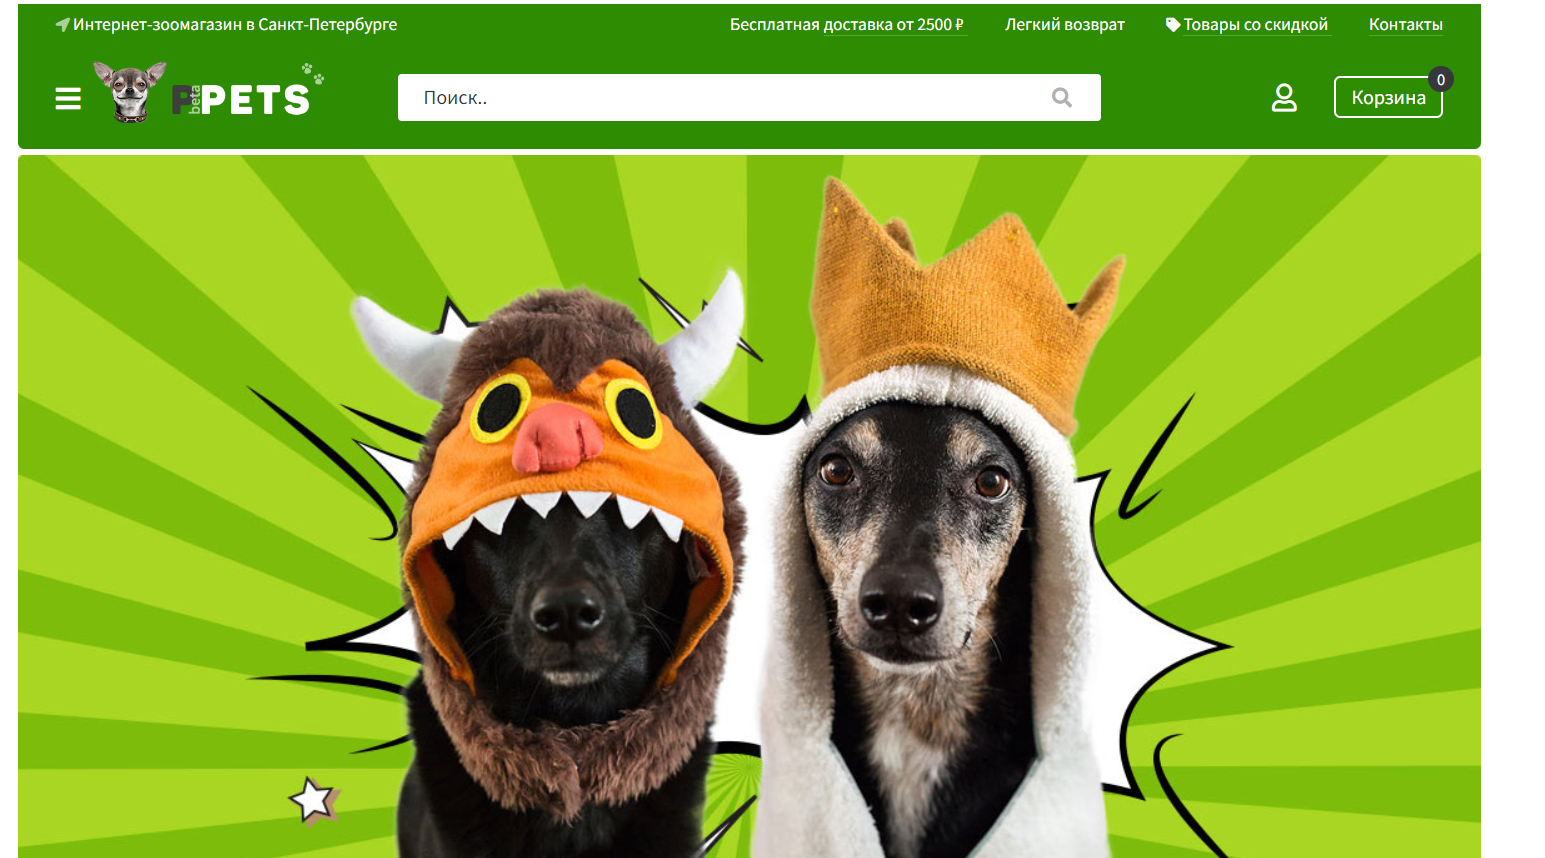

Есть часть странных наблюдений, которые попадают в очень большое количество категорий, которые при ближайшем рассмотрении оказались вообще не их. Например, этот магазин зоотоваров попал в разделы товаров для авто, домшний интерьер и др. Эти данные так же выглядят в исходниках. Скорее всего баг на сайте с присвоением катеогрии. Таких наблюдений, которые точно выглядят подозрительно, всего 1300 штук из 500к+, предлагаю удалить их

In [70]:
len(pd.pivot_table(pois,index=('link'),values='count',aggfunc=sum)[pd.pivot_table(pois,index=('link'),values='count',aggfunc=sum)['count']>5])

1396

In [71]:
outlayers=pd.pivot_table(pois,index=('link'),values='count',aggfunc=sum).reset_index()
pois=pd.merge(pois,outlayers,how='left',on='link')
pois=pois[pois['count_y']<5]
del pois['count_y']
del pois['count_x']
pois['count']=1
pois.head(2)

Unnamed: 0  index            coordinates        name  \
0           0    0.0   [30.205252, 59.8616]      GPower   
1           1    1.0  [30.205848, 59.86133]  Global Gas   

                                         link category subcategory  subcat_id  \
0   https://spb.spravker.ru/agzs/gpower-1.htm   /avto/      /agzs/          3   
1  https://spb.spravker.ru/agzs/globalgas.htm   /avto/      /agzs/          3   

        lat        lon             h3_9  sub_cat_code_num new_sub_cat_code  \
0  59.86160  30.205252  8911061503bffff               3.0      agzs or azs   
1  59.86133  30.205848  8911061503bffff               3.0      agzs or azs   

   count  
0      1  
1      1

In [72]:
len(pois)

776653

Окей, распределение особо не поменялось, зато адекватность выросла

In [73]:
pd.pivot_table(pois,index=('link'),values='count',aggfunc=sum).reset_index().describe()

count
count  518570.000000
mean        1.497682
std         0.745746
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000

In [74]:
pd.pivot_table(pois,index='h3_9',values='count',aggfunc=sum).reset_index().sort_values('count').tail(10)

h3_9  count
3267  89110614aafffff   1351
1693  8911060607bffff   1360
1684  89110606053ffff   1389
1801  891106062b3ffff   1405
69    8911060088fffff   1476
5957  891106ab3c3ffff   1486
4506  891106a8157ffff   1527
5208  891106a9657ffff   1540
1855  89110606407ffff   2054
1871  8911060644fffff   2172

In [109]:
import keplergl
import base64
map1 = keplergl.KeplerGl(height=400, data={"data_1":pd.pivot_table(pois,index='h3_9',values='count',aggfunc=sum).reset_index().sort_values('count').tail(10)})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [114]:

import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(pois[pois['h3_9']=='8911060644fffff'], 
                        lat="lat", 
                        lon="lon", 
                        hover_name="name", 
                        hover_data=["name"],
                        #color="Listed",
                        #color_continuous_scale=color_scale,
                        #size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Самый загруженный район - сенная площадь. В основном - различные услуги и мелкие ИП, также магазины одежды,общепит и услуги красоты

In [117]:
pd.pivot_table(pois[pois['h3_9']=='8911060644fffff'],index='new_sub_cat_code',values='count',aggfunc=sum).sort_values(by='count')

count
new_sub_cat_code                           
library                                   1
vet clinics                               1
avto_buy                                  1
nochnye-kluby                             1
museum                                    1
sport                                     1
kino                                      2
rynki                                     2
sluzhby-ekstrennogo-vyzova                3
kindergarten                              4
theater                                   4
vet service                               4
university                                5
sredstva-massovoj-informatsii             5
religion                                  5
sport shop                                6
bezopasnost                               6
vet-shop                                  7
spravochno-informatsionnyie-sistemyi      9
apteki                                   10
safety-shop                              11
school                                   11
hospitality                              13
furniture                                15
hospital                                 21
torgovye-centry                          25
punkt-vydachi                            26
transport                                27
otdyih-i-razvlecheniya                   35
supermarket                              39
sport-i-fitnes                           39
RE-service                               39
dom-i-interer                            40
reklama                                  41
additional education                     43
avto_shop                                44
tech                                     44
hobby                                    46
clothers                                 47
gosudarstvo-i-obschestvo                 49
tourism services                         49
avto_service                             52
finansyi                                 60
med-service                              71
tovaryi-dlya-detej                       73
telekommunikatsii-i-svyaz                82
internet-service                         89
eda-i-napitki                            95
stroitelstvo-i-remont                    99
krasota-i-zdorove                       102
proizvodstvo-i-postavki                 121
biznes                                  136
clothes                                 140
uslugi                                  270

In [75]:
import keplergl
import base64
map1 = keplergl.KeplerGl(height=400, data={"data_1":pd.pivot_table(pois,index='h3_9',values='count',aggfunc=sum).reset_index()})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [106]:
pois.columns

Index(['Unnamed: 0', 'index', 'coordinates', 'name', 'link', 'category',
       'subcategory', 'subcat_id', 'lat', 'lon', 'h3_9', 'sub_cat_code_num',
       'new_sub_cat_code', 'count'],
      dtype='object')

# Работаем с временем

In [76]:
#оставлю только питер
tracks_ready=tracks_ready[tracks_ready['in spb']==1]

In [77]:
pois_pivot=pd.pivot_table(pois,index='h3_9',columns='new_sub_cat_code',values='count',aggfunc=sum).reset_index()
tracks_ready=pd.merge(tracks_ready,pois_pivot,how='left',on='h3_9')

Первым делом меня интересует выделение топ-5 по посещаемости индивидом мест. Создам признак для главного датасета, где для каждой сцепки индивид-гекс будет обозначение, входит ли этот гекс для этого человека в топ 5 (будет соответствующиее место в переменной top5), если не входит - то будет стоять 0.

In [78]:
#сделаю то же самое что было ранее, но с мЕньшим количеством наблюдений после урезки данных. Что делать, если человек где-то проводит одинаковое количество времени? Я решила
#присудить первенство по вхождению 
tracks_ready['count']=1
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='time_spent',aggfunc=sum).reset_index()
hex_pivot['top5']=hex_pivot.groupby('id')['time_spent'].rank(method='first',ascending=False)
hex_pivot['top5']=list(map(lambda x:x if x<6 else 0,hex_pivot['top5']))
hex_pivot.columns=['id', 'h3_9', 'time_spent_at_all', 'top5']
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','time_spent_at_all','top5']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

1- ночь

2- утро

3- рабочее время 

4-вечер

In [79]:
def detect_part_of_day(dttm):
    dttm=dttm.time()
    if (dttm>datetime.strptime('2023-03-03 19:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 23:59:00', '%Y-%m-%d %H:%M:%S').time()):
        return 4
    if (dttm>datetime.strptime('2023-03-03 00:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 06:00:00', '%Y-%m-%d %H:%M:%S').time()):
        return 1
    if (dttm>datetime.strptime('2023-03-03 06:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 10:00:00', '%Y-%m-%d %H:%M:%S').time()):
        return 2
    if (dttm>datetime.strptime('2023-03-03 10:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 19:00:00', '%Y-%m-%d %H:%M:%S').time()):
        return 3

    

In [80]:
tracks_ready['part_of_day_s']=list(map(detect_part_of_day,tracks_ready['start_dttm']))
tracks_ready['part_of_day_e']=list(map(detect_part_of_day,tracks_ready['end_dttm']))

In [81]:
def detect_part_of_day_2(dttm_s,dttm_e,what_return):
    dttm_s=dttm_s.time()
    dttm_e=dttm_e.time()
    numeric_version_s=float(str(dttm_s).split(':')[0])+0.01*float(str(dttm_s).split(':')[1])
    numeric_version_e=float(str(dttm_e).split(':')[0])+0.01*float(str(dttm_e).split(':')[1])
    timeline_time=np.array([0,6,10,19,24])
    time_diff_s=timeline_time-numeric_version_s
    time_diff_e=timeline_time-numeric_version_e
    index_s=np.where(time_diff_s>=0)[0][0]
    index_e=np.where(time_diff_e<=0)[0][-1]
    if what_return==1:
        return round(time_diff_s[index_s],2)
    else:
        return round(time_diff_e[index_e],2)

In [82]:
tracks_ready['part_of_day_s_len']=list(map(detect_part_of_day_2,tracks_ready['start_dttm'],tracks_ready['end_dttm'],np.ones((len(tracks_ready)))))
tracks_ready['part_of_day_e_len']=list(map(detect_part_of_day_2,tracks_ready['start_dttm'],tracks_ready['end_dttm'],2*np.ones((len(tracks_ready)))))

In [83]:
def detect_part_of_day_f(part_s,part_e,part_s_len,part_e_len,time_spent):
    if (abs(part_e-part_s)<=1):
        if part_s_len>=abs(part_e_len):
            return part_s
        else:
            return part_e
    elif time_spent/60>24:
        return "whole day" #morning and working hours
    else:
        if (part_s==1)or((part_s==4)):
            return 'whole day end' #night and evening
        else:
            return 'whole day'
        

In [84]:
tracks_ready['final_part_of_day']=list(map(detect_part_of_day_f,tracks_ready['part_of_day_s'],tracks_ready['part_of_day_e'],tracks_ready['part_of_day_s_len'],tracks_ready['part_of_day_e_len'],tracks_ready['time_spent']))
tracks_ready['final_part_of_day_in_word']=tracks_ready['final_part_of_day'].replace(1,'night').replace(2,'morning').replace(3,'working hours').replace(4,'evening')

<AxesSubplot:xlabel='top5', ylabel='final_part_of_day_in_word'>

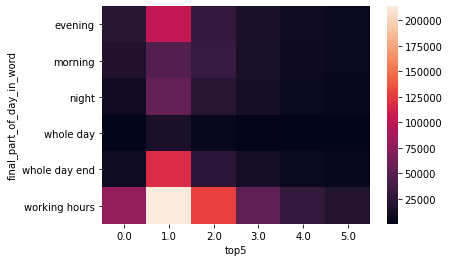

In [86]:
import seaborn as sns
sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='top5',values='count',aggfunc=sum)) 


<AxesSubplot:xlabel='top5', ylabel='final_part_of_day_in_word'>

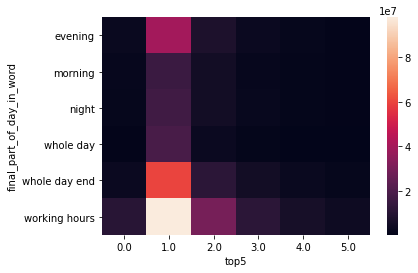

In [87]:
import seaborn as sns
sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='top5',values='time_spent',aggfunc=sum)) 


Теперь мне интересно посмотреть топ не по кол-ву проведенного времени, а по частоте посещения, а также по средней продолжительности пребывания

In [88]:
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='count',aggfunc=sum).reset_index()
hex_pivot['top5_fr']=hex_pivot.groupby('id')['count'].rank(method='first',ascending=False)
hex_pivot['top5_fr']=list(map(lambda x:x if x<6 else 0,hex_pivot['top5_fr']))
hex_pivot_2=pd.pivot_table(tracks_ready,index=('id'),values='count',aggfunc=sum).reset_index()
hex_pivot=pd.merge(hex_pivot,hex_pivot_2,how='left',on='id')
hex_pivot['level_of_visit%']=hex_pivot['count_x']/hex_pivot['count_y']*100
hex_pivot.columns=['id', 'h3_9', 'number of visits of hex', 'top5_fr', 'count_y', 'level_of_visit%']



In [89]:
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','level_of_visit%','top5_fr','number of visits of hex']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

In [90]:
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='time_spent',aggfunc=np.mean).reset_index()
hex_pivot['top5_avr']=hex_pivot.groupby('id')['time_spent'].rank(method='first',ascending=False)
hex_pivot['top5_avr']=list(map(lambda x:x if x<6 else 0,hex_pivot['top5_avr']))
hex_pivot.columns=['id', 'h3_9', 'time_spent_avr', 'top5_avr']
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','time_spent_avr','top5_avr']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

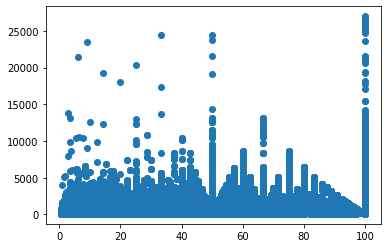

In [91]:
plt.scatter(tracks_ready['level_of_visit%'],tracks_ready['time_spent_avr'])
plt.show()

Хочу идентифицировать гексы, которые посещались только 1 раз

<AxesSubplot:xlabel='top5', ylabel='final_part_of_day_in_word'>

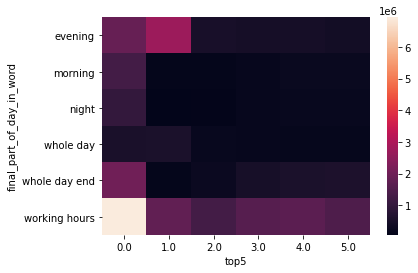

In [92]:

sns.heatmap(pd.pivot_table(tracks_ready[tracks_ready['number of visits of hex']==1],index='final_part_of_day_in_word',columns='top5',values='time_spent',aggfunc=sum)) 

In [93]:
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),columns='current_date',values='count',aggfunc=sum).reset_index().replace(np.nan,0)
hex_pivot.iloc[:,2:]=hex_pivot.iloc[:,2:].values/hex_pivot.iloc[:,2:].values
hex_pivot=hex_pivot.replace(np.nan,0)
hex_pivot['num of days appear']=np.sum(hex_pivot.iloc[:,2:],axis=1)
hex_pivot['num of days appear fr']=hex_pivot['num of days appear'].values/(len(hex_pivot.columns)-3)
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','num of days appear','num of days appear fr']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [94]:
tracks_ready['number of visits of hex per day']=round(tracks_ready['number of visits of hex']/tracks_ready['num of days appear'])


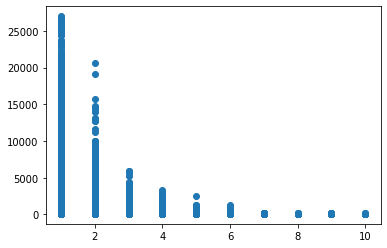

In [95]:
plt.scatter(tracks_ready['number of visits of hex per day'],tracks_ready['time_spent'])

<AxesSubplot:xlabel='number of visits of hex per day', ylabel='final_part_of_day_in_word'>

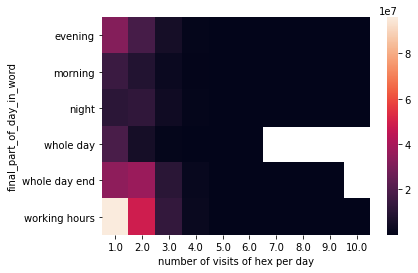

In [96]:

sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='number of visits of hex per day',values='time_spent',aggfunc=sum)) 

In [97]:
tracks_ready['time_spent_avr_h']=tracks_ready['time_spent_avr']/60

<AxesSubplot:xlabel='time_spent_avr_h', ylabel='Count'>

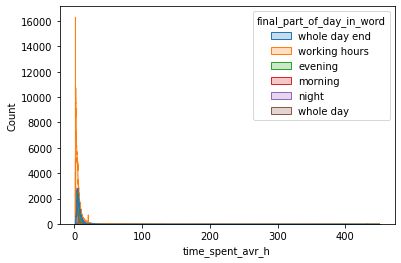

In [98]:
sns.histplot(tracks_ready, x="time_spent_avr_h", hue="final_part_of_day_in_word", element="step")

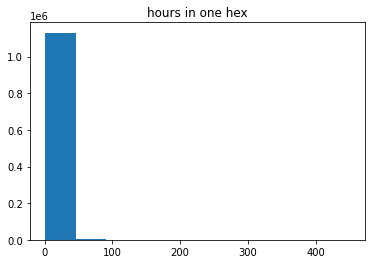

450.1394444444444  hours= 18.755810185185183  days
5.568480189337443  hours= 0.23202000788906008  days


In [99]:
plt.hist(tracks_ready.time_spent/60)
plt.title('hours in one hex')
plt.show()
print(max(tracks_ready.time_spent/60),' hours=',max(tracks_ready.time_spent)/24/60,' days')
print(np.mean(tracks_ready.time_spent/60),' hours=',np.mean(tracks_ready.time_spent)/24/60,' days')

In [100]:
tracks_ready.describe()

id  centroid_lon  centroid_lat  start_dttm_day    time_spent  \
count  1.138203e+06  1.138203e+06  1.138203e+06    1.138203e+06  1.138203e+06   
mean   3.851445e+11  3.034803e+01  5.993592e+01    1.160262e+01  3.341088e+02   
std    2.233664e+11  9.841018e-02  7.482667e-02    5.220846e+00  6.287097e+02   
min    0.000000e+00  3.009502e+01  5.980487e+01    3.000000e+00  6.000000e+01   
25%    1.889786e+11  3.027830e+01  5.986570e+01    7.000000e+00  8.363333e+01   
50%    3.865471e+11  3.035064e+01  5.993106e+01    1.200000e+01  1.531167e+02   
75%    5.755256e+11  3.042060e+01  6.000245e+01    1.600000e+01  4.150000e+02   
max    7.730941e+11  3.060893e+01  6.009328e+01    2.000000e+01  2.700837e+04   

           count  time_spent_bt_events           id1          idm1  \
count  1138203.0          1.138203e+06  1.138203e+06  1.138203e+06   
mean         1.0          1.237882e+02  3.851443e+11  3.851441e+11   
std          0.0          3.782873e+02  2.233664e+11  2.233664e+11   
min          1.0         -1.666667e-02  0.000000e+00  0.000000e+00   
25%          1.0          0.000000e+00  1.889786e+11  1.889786e+11   
50%          1.0          4.468333e+01  3.865471e+11  3.865471e+11   
75%          1.0          1.280333e+02  5.755256e+11  5.755256e+11   
max          1.0          2.355702e+04  7.730941e+11  7.730941e+11   

              tsbe1  ...  part_of_day_e_len  level_of_visit%       top5_fr  \
count  1.138203e+06  ...       1.138203e+06     1.138203e+06  1.138203e+06   
mean  -3.508673e+02  ...      -3.206206e+00     3.670802e+01  1.564735e+00   
std    3.457192e+03  ...       2.296629e+00     2.717211e+01  1.161843e+00   
min   -2.724265e+04  ...      -8.590000e+00     6.024096e-01  0.000000e+00   
25%    0.000000e+00  ...      -4.500000e+00     1.250000e+01  1.000000e+00   
50%    4.436667e+01  ...      -3.020000e+00     3.333333e+01  1.000000e+00   
75%    1.280500e+02  ...      -1.310000e+00     5.535714e+01  2.000000e+00   
max    2.355702e+04  ...       0.000000e+00     1.000000e+02  5.000000e+00   

       number of visits of hex  time_spent_avr      top5_avr  \
count             1.138203e+06    1.138203e+06  1.138203e+06   
mean              2.162035e+01    3.341088e+02  1.748267e+00   
std               1.785918e+01    5.038922e+02  1.468544e+00   
min               1.000000e+00    6.000000e+01  0.000000e+00   
25%               6.000000e+00    1.404549e+02  1.000000e+00   
50%               1.900000e+01    2.401429e+02  1.000000e+00   
75%               3.300000e+01    3.801225e+02  3.000000e+00   
max               1.200000e+02    2.700837e+04  5.000000e+00   

       num of days appear  num of days appear fr  \
count        1.138203e+06           1.138203e+06   
mean         1.056244e+01           5.559181e-01   
std          6.204283e+00           3.265412e-01   
min          1.000000e+00           5.263158e-02   
25%          5.000000e+00           2.631579e-01   
50%          1.100000e+01           5.789474e-01   
75%          1.600000e+01           8.421053e-01   
max          1.900000e+01           1.000000e+00   

       number of visits of hex per day  time_spent_avr_h  
count                     1.138203e+06      1.138203e+06  
mean                      1.770514e+00      5.568480e+00  
std                       8.230494e-01      8.398204e+00  
min                       1.000000e+00      1.000000e+00  
25%                       1.000000e+00      2.340916e+00  
50%                       2.000000e+00      4.002381e+00  
75%                       2.000000e+00      6.335375e+00  
max                       1.000000e+01      4.501394e+02  

[8 rows x 118 columns]

In [101]:
tracks_ready['weekend']=list(map(lambda x: 1 if x.weekday()>4 else 0,tracks_ready['current_date']))

<AxesSubplot:xlabel='weekend', ylabel='final_part_of_day_in_word'>

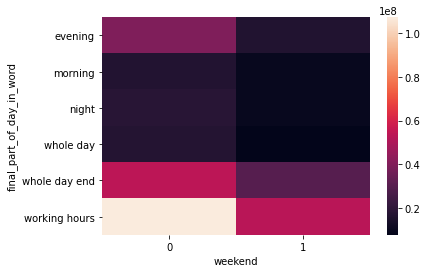

In [102]:
sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='weekend',values='time_spent',aggfunc=sum)) 

top5 - просто суммарно кол-во проведенного времени в гексе. может быть как набрано отдельными наблюдениями, так и одним непрерывным пребыванием

top-fr - по частоте появления, где чаще всего мелкает

top5_avr - по среднему времени пребывания в гексе

Интересно, как часты случаи, когда top5 на самом деле не самый частопосещаемый? Или не первый по времени пребывания?

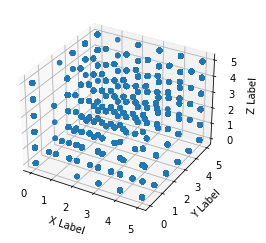

In [104]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(tracks_ready['top5'], tracks_ready['top5_fr'], tracks_ready['top5_avr'])

ax.set_xlabel('top5')
ax.set_ylabel('top5_fr')
ax.set_zlabel('top5_avr')

plt.show()

In [105]:
pd.pivot_table(tracks_ready,index='top5',values=('top5_fr','top5_avr'),aggfunc=np.mean)

top5_avr   top5_fr
top5                    
0.0   0.515746  0.949932
1.0   1.568065  1.108117
2.0   2.394832  1.857413
3.0   2.419710  2.677299
4.0   2.193329  3.102088
5.0   2.112597  2.992217

In [127]:

import keplergl
import base64
map1 = keplergl.KeplerGl(height=400, data={"data_1":tracks_ready[['h3_9','time_spent_avr']][tracks_ready['top5_avr']==1].drop_duplicates(subset=['h3_9','time_spent_avr'])})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [131]:
tracks_ready['dist from center']=tracks_ready['distance']=list(map(find_dist1,tracks_ready['centroid_lat'],tracks_ready['centroid_lon'],np.ones_like(tracks_ready['centroid_lat'].values)*59.9398,np.ones_like(tracks_ready['centroid_lat'].values)*30.3146))

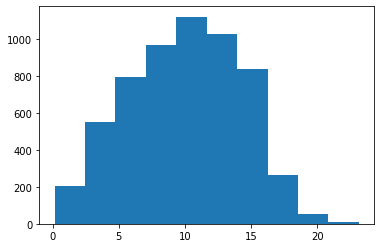

In [132]:

plt.hist(tracks_ready[['h3_9','dist from center']].drop_duplicates(subset='h3_9')['dist from center'])
plt.show()

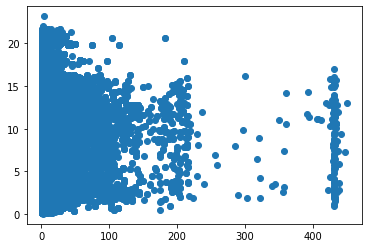

In [144]:
plt.scatter(tracks_ready['time_spent_avr']/60,tracks_ready['dist from center'])
plt.show()

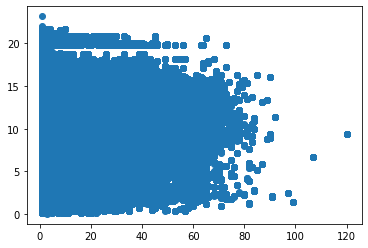

In [145]:
plt.scatter(tracks_ready['number of visits of hex'],tracks_ready['dist from center'])
plt.show()

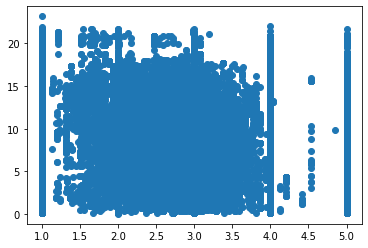

In [147]:
plt.scatter(tracks_ready['income'],tracks_ready['dist from center'])
plt.show()

снова выбиваются те, кто вообще локацию не покадиает - может, дропнуть их?

In [168]:
hex_description=['h3_9','time_spent_at_all', 'top5', 'part_of_day_s', 'part_of_day_e', 'part_of_day_s_len',
 'part_of_day_e_len', 'final_part_of_day', 'final_part_of_day_in_word', 'level_of_visit%', 'top5_fr', 'number of visits of hex',
 'time_spent_avr', 'top5_avr', 'num of days appear', 'num of days appear fr', 'number of visits of hex per day',
 'time_spent_avr_h', 'time_spent','dist from center','weekend']
id_description=['id','age','car_owners','carsharing_user','not_citizen_rf','gender','healthy_food_inter','income','public_trnsprt_user','pharmacies_inter',
 'beauty_salon_inter','elite_sports_inter','sprtswr_ftwr_inter','sprt_good_inter','trvl_rus','trvl_abrd','sprt_fit_inter','hunting_fishing_inter',
 'fashion_inter','coffee_inter', 'med_serv_inter','education_inter','delivery_inter','markets_inter','no_children']
pois_description=['id','h3_9','RE-service','additional education', 'agzs or azs', 'apteki', 'avto_buy', 'avto_service',
 'avto_shop', 'bezopasnost', 'biznes', 'cemetery', 'clothers', 'clothes', 'dom-i-interer', 'eda-i-napitki',
 'finansyi', 'furniture', 'gai-gibdd', 'gosudarstvo-i-obschestvo', 'hobby', 'hospital', 'hospitality', 'internet-service',
 'kindergarten', 'kino', 'krasota-i-zdorove', 'library', 'med-service', 'med-shop', 'museum', 'nochnye-kluby',
 'otdyih-i-razvlecheniya', 'park', 'pozharnye-chasti', 'proizvodstvo-i-postavki', 'punkt-vydachi', 'reklama',
 'religion', 'rynki', 'safety-shop', 'school', 'shop', 'sluzhby-ekstrennogo-vyzova',
 'sluzhby-spaseniia', 'social housing', 'sport', 'sport shop', 'sport-i-fitnes', 'spravochno-informatsionnyie-sistemyi',
 'sredstva-massovoj-informatsii', 'stroitelstvo-i-remont',
 'supermarket', 'tech', 'telekommunikatsii-i-svyaz', 'theater',
 'torgovye-centry', 'tourism services', 'tovaryi-dlya-detej', 'transport',
 'university', 'upravlenie-obrazovaniem', 'uslugi', 'vet clinics', 'vet service', 'vet-shop']

Общие данные

In [177]:
by_id_empty=tracks.drop_duplicates('id')
by_id_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 2716689
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  41263 non-null  int64         
 1   Unnamed: 0             41263 non-null  int64         
 2   Unnamed: 0.1           41263 non-null  int64         
 3   id                     41263 non-null  int64         
 4   start_dttm             41263 non-null  datetime64[ns]
 5   end_dttm               41263 non-null  datetime64[ns]
 6   centroid_wkt           41263 non-null  object        
 7   centroid_lon           41263 non-null  float64       
 8   centroid_lat           41263 non-null  float64       
 9   start_dttm_day         41263 non-null  int64         
 10  h3_9                   41263 non-null  object        
 11  age                    38752 non-null  float64       
 12  car_owners             41263 non-null  int64         
 13 

Насколько можно доверять этой информации?

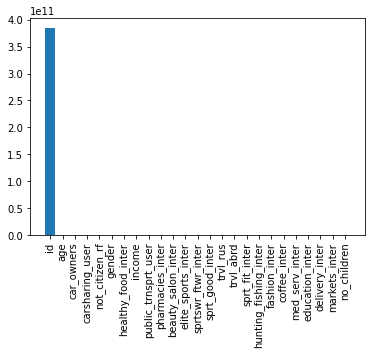

In [178]:
plt.bar(id_description,np.mean(by_id_empty[id_description].values,axis=0))
plt.xticks(rotation=90)
plt.show()

In [180]:
by_id_empty[['age','income','gender']].describe()

age        income        gender
count  38752.000000  34980.000000  41263.000000
mean      45.058242      2.418725      0.457335
std       14.245942      1.392025      0.498182
min       14.000000      1.000000      0.000000
25%       35.000000      1.000000      0.000000
50%       43.000000      2.000000      0.000000
75%       55.000000      4.000000      1.000000
max       90.000000      5.000000      1.000000

<AxesSubplot:>

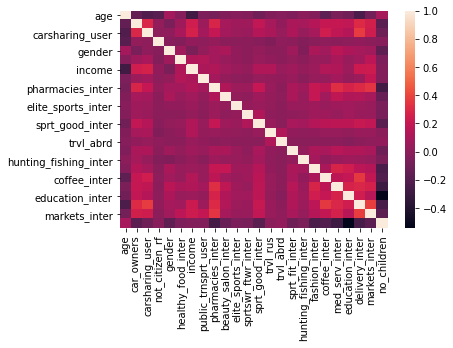

In [152]:
sns.heatmap(tracks_ready[id_description].corr())

# Пример 1 абонента

In [164]:
def plot_h3(data):
    import keplergl
    import base64
    map1 = keplergl.KeplerGl(height=400, data={"data_1":data})
    orig_html = str(map1._repr_html_(),'utf-8')
    b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
    framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
    import IPython
    return IPython.display.HTML(framed_html)

In [153]:
example_id=tracks_ready[tracks_ready['id']==0]

In [161]:
example_id[example_id['top5']!=0][hex_description].drop_duplicates('h3_9')

h3_9  time_spent_at_all  top5  part_of_day_s  part_of_day_e  \
0   891106a9817ffff       11528.900000   1.0            1.0            3.0   
4   891106a9d4bffff        1886.433333   3.0            1.0            2.0   
5   891106a987bffff        2943.366667   2.0            2.0            3.0   
33  891106a9873ffff         219.483333   4.0            2.0            3.0   
93  89110604c47ffff          94.066667   5.0            3.0            3.0   

    part_of_day_s_len  part_of_day_e_len final_part_of_day  \
0                5.82              -1.44     whole day end   
4                0.65              -2.35               2.0   
5                0.49              -2.51               3.0   
33               0.52              -2.25               3.0   
93               5.66              -5.08               3.0   

   final_part_of_day_in_word  level_of_visit%  top5_fr  \
0              whole day end        59.803922      1.0   
4                    morning        12.745098      3.0   
5              working hours        23.529412      2.0   
33             working hours         1.960784      4.0   
93             working hours         0.980392      5.0   

    number of visits of hex  time_spent_avr  top5_avr  num of days appear  \
0                        61      188.998361       1.0                18.0   
4                        13      145.110256       2.0                10.0   
5                        24      122.640278       3.0                 9.0   
33                        2      109.741667       4.0                 2.0   
93                        1       94.066667       5.0                 1.0   

    num of days appear fr  number of visits of hex per day  time_spent_avr_h  \
0                0.947368                              3.0          3.149973   
4                0.526316                              1.0          2.418504   
5                0.473684                              3.0          2.044005   
33               0.105263                              1.0          1.829028   
93               0.052632                              1.0          1.567778   

    time_spent  dist from center  
0   685.600000         11.356844  
4   180.000000         11.714568  
5   179.750000         11.084457  
33  156.633333         11.286952  
93   94.066667          9.914337

Абсолютный лидер - гекс 891106a9817ffff	, абонент проводит там максимальное кол-во времени как по общему суммарному времени, так и по среднему, так и по частоте. Посещает этого гексогон в среднем 3 раза за сутки, стабильно появлялся там все дни наблюдений, в среднем проводил в этом гексе около 3 часов. Все топы по посещению находятся в 11 км от центра города

In [165]:
plot_h3(example_id[example_id['top5']!=0][hex_description].drop_duplicates('h3_9')[['h3_9','time_spent']])

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


<AxesSubplot:xlabel='top5', ylabel='final_part_of_day_in_word'>

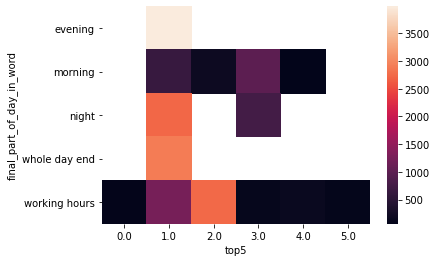

In [167]:

sns.heatmap(pd.pivot_table(example_id,index='final_part_of_day_in_word',columns='top5',values='time_spent',aggfunc=sum)) 

У этого абонента очевидно, что рабочее пространство находится в районе 891106a987bffff, где он проводит второй по количеству объем времени. Очевидно, что дом - зона номер 1 top5. 

<AxesSubplot:xlabel='number of visits of hex per day', ylabel='final_part_of_day_in_word'>

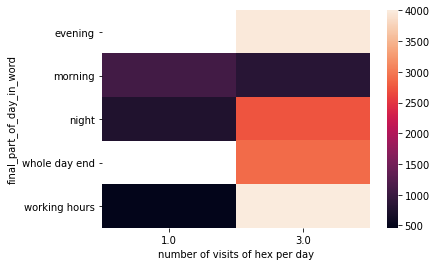

In [166]:

sns.heatmap(pd.pivot_table(example_id,index='final_part_of_day_in_word',columns='number of visits of hex per day',values='time_spent',aggfunc=sum)) 

Ему 51, это мужчина, c высоким (наивысшем) уровнем достатка, увлекается ЗОЖ, беспокоится о здоровье и внешнем виде,без детей.

In [172]:
example_id[id_description].drop_duplicates(subset='id')
for column in id_description:
    if example_id[column][0]>0:
        print(column,example_id[column][0])


age 51.0
not_citizen_rf 1
gender 1
healthy_food_inter 1
income 5.0
pharmacies_inter 1
sprt_good_inter 1
fashion_inter 1
markets_inter 1
no_children 1


In [185]:
for column in example_id[example_id['h3_9']=='891106a9817ffff'].drop_duplicates(subset='h3_9')[pois_description].columns:
    try:
        if example_id[column][0]>0:
            print(column,example_id[column][0])
    except TypeError:
        pass

additional education 7.0
apteki 2.0
avto_service 12.0
avto_shop 14.0
biznes 12.0
clothes 6.0
dom-i-interer 3.0
eda-i-napitki 15.0
finansyi 1.0
furniture 3.0
gosudarstvo-i-obschestvo 6.0
hobby 2.0
hospital 5.0
hospitality 1.0
internet-service 11.0
kindergarten 8.0
krasota-i-zdorove 13.0
med-service 9.0
proizvodstvo-i-postavki 32.0
punkt-vydachi 3.0
reklama 2.0
safety-shop 4.0
school 2.0
sport-i-fitnes 7.0
stroitelstvo-i-remont 11.0
supermarket 4.0
tech 1.0
telekommunikatsii-i-svyaz 1.0
torgovye-centry 4.0
tovaryi-dlya-detej 7.0
uslugi 32.0
vet clinics 1.0
vet service 2.0
vet-shop 1.0


В данном районе находится 2 аптеки, несколько заведений, предоставляющих мед услуги, 7 спортклубов, 4 ТЦ, 5 больниц - это потенциальные точки интереса абонента. 

In [186]:
plot_h3(example_id[hex_description].drop_duplicates('h3_9')[['h3_9','time_spent']])

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


PS геолокации вкл обязательно в кластеризацию

## Clustering

#### first - get rid of nans

### Spacial clustering: K-means

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [85]:
features = ['centroid_lon', 'centroid_lat', 'start_dttm_day', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user']

In [87]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tracks[features])

In [ ]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(data_scaled)

In [ ]:
data['cluster'] = kmeans.labels_

In [ ]:
print(data[['id', 'centroid_lon', 'centroid_lat', 'cluster']])

### Temporal clustering: STL or PHON

### Density-based clustering: DBSCAN

In [13]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [14]:
# features
features = ['centroid_lon', 'centroid_lat', 'start_dttm_day', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user']

In [15]:
# standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tracks[features])

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed
data['cluster'] = dbscan.fit_predict(data_scaled)

In [ ]:
print(data[['id', 'centroid_lon', 'centroid_lat', 'cluster']])

### Contextual clustering: CHC or CILSA

### Anomaly detection: One-Class SVM or Local Outlier Factor (LOF)

### Dimensionality reduction: PCA

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# features for PCA
features = ['centroid_lon', 'centroid_lat', 'start_dttm_day', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user']

In [19]:
# standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tracks[features])

In [ ]:
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

In [ ]:
# combine the components with the original dataset
final_data = pd.concat([principal_df, data['id']])

In [ ]:
print(final_data)